# Coursework 3

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [639]:
using JLD2,FileIO
using LinearAlgebra, Wavelets, FFTW, LinearMaps, IterativeSolvers, LinearOperators, Plots

In [640]:
Base.@kwdef mutable struct CourseWork_3
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    Demo_willing::Union{Missing,Bool}
    
    # 8.1 Proximal Operator
    
    Q8_1_a_data_z::Vector
    Q8_1_a_data_gamma::Float64
    
    Q8_1_a_ans_x::Union{Missing,Vector}
    
    Q8_1_b_data_z::Vector
    Q8_1_b_data_gamma::Float64
    
    Q8_1_b_ans_x::Union{Missing,Vector}
    
    # 8.2  MRI CS Recovery: ADMM
    
    Q8_2_data_y::Vector
    Q8_2_data_Omega::Matrix
    Q8_2_data_X2_ini::Matrix
    Q8_2_data_X3_ini::Matrix
    Q8_2_data_X4_ini::Matrix
    Q8_2_data_X5_ini::Matrix
    Q8_2_data_U2_ini::Matrix
    Q8_2_data_U3_ini::Matrix
    Q8_2_data_U4_ini::Matrix
    Q8_2_data_U5_ini::Matrix
    Q8_2_data_lambda1::Float64
    Q8_2_data_lambda2::Float64
    Q8_2_data_lambda3::Float64
    Q8_2_data_rho::Float64
    
    Q8_2_1_ans_X1::Union{Missing,Matrix}
    
    Q8_2_2_ans_X2::Union{Missing,Matrix}
    Q8_2_2_ans_X3::Union{Missing,Matrix}
    Q8_2_2_ans_X4::Union{Missing,Matrix}
    Q8_2_2_ans_X5::Union{Missing,Matrix}
    
    Q8_2_3_ans_U2::Union{Missing,Matrix}
    Q8_2_3_ans_U3::Union{Missing,Matrix}
    Q8_2_3_ans_U4::Union{Missing,Matrix}
    Q8_2_3_ans_U5::Union{Missing,Matrix}
    
    Q8_2_4_ans_Xhat::Union{Missing,Matrix}
    
    # 8.3. Blind Deconvolution: Convex Relaxation
    
    Q8_3_data_y::Vector
    Q8_3_data_X2_ini::Matrix
    Q8_3_data_X3_ini::Matrix
    Q8_3_data_X4_ini::Matrix
    Q8_3_data_U2_ini::Matrix
    Q8_3_data_U3_ini::Matrix
    Q8_3_data_U4_ini::Matrix
    Q8_3_data_lambda1::Float64
    Q8_3_data_lambda2::Float64
    Q8_3_data_lambda3::Float64
    
    Q8_3_2_ans_X1::Union{Missing,Matrix}
    
    Q8_3_3_ans_X2::Union{Missing,Matrix}
    Q8_3_3_ans_X3::Union{Missing,Matrix}
    Q8_3_3_ans_X4::Union{Missing,Matrix}
    
    Q8_3_4_ans_U2::Union{Missing,Matrix}
    Q8_3_4_ans_U3::Union{Missing,Matrix}
    Q8_3_4_ans_U4::Union{Missing,Matrix}
    
    Q8_3_5_ans_Xhat::Union{Missing,Matrix}
    
    # Blind Deconvolution
    
    Q8_4_data_y::Vector
    Q8_4_data_x1ini::Vector
    Q8_4_data_x2ini::Vector
    Q8_4_data_x3ini::Vector
    Q8_4_data_h1ini::Vector
    Q8_4_data_h2ini::Vector
    Q8_4_data_alpha::Float64
    
    Q8_4_1_a_ans_H::Union{Missing,Matrix}
    Q8_4_1_b_ans_tau::Union{Missing,Float64}
    Q8_4_1_c_ans_x1::Union{Missing,Vector}
    Q8_4_1_c_ans_x2::Union{Missing,Vector}
    Q8_4_1_c_ans_x3::Union{Missing,Vector}
    Q8_4_1_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_2_a_ans_H::Union{Missing,Matrix}
    Q8_4_2_b_ans_tau::Union{Missing,Float64}
    Q8_4_2_c_ans_h1::Union{Missing,Vector}
    Q8_4_2_c_ans_h2::Union{Missing,Vector}
    Q8_4_2_d_ans_subg::Union{Missing,Vector}
    
    Q8_4_3_ans_subg::Union{Missing,Vector}
    
    Q8_4_4_ans_x1::Union{Missing,Vector}
    Q8_4_4_ans_h1::Union{Missing,Vector}
    
    
    
end

CourseWork_3

In [641]:
# Download and upload data from JLD file, refer to https://juliaio.github.io/JLD2.jl/dev/ 

# Example
A = JLD2.load("Chin Young Anson, Hon1260366StudentFile.jld2");
A = A[ "CourseWork_3" ];
A.Demo_willing = true;


In [642]:
jldopen("Chin Young Anson, Hon1260366StudentFile.jld2", "w") do file
    write(file, "CourseWork_3", A)
 end

## 8.1. Proximal Operator (Continued)


### 1. (a)

In [643]:
z = A.Q8_1_a_data_z
gamma = A.Q8_1_a_data_gamma

# Differentiable least square problem.
# Differentiating with respect to x and then set to zero gives:
output = z / (gamma + 1)

### 8.1a Assign to answer: 
A.Q8_1_a_ans_x = output;

### 1. (b)

In [644]:
z = A.Q8_1_b_data_z
gamma = A.Q8_1_b_data_gamma

function prox_eucl_norm(z, gamma)
    # Use closed form solution for L2 norm 
    temp = 1-gamma/norm(z)  
    temp2 = maximum([0,temp])       # Choose maximum of 0 vs 1-gamma/norm(z)
    return temp2*z
end
output = prox_eucl_norm(z, gamma)

### 8.1b Assign to answer: 
A.Q8_1_b_ans_x = output;

## 8.2. MRI CS Recovery: ADMM

### 1

### 2

### 3

### 4

## 8.3. Blind Deconvolution: Convex Relaxation

### 1

In [649]:
A.Q8_3_data_y      
A.Q8_3_data_X2_ini 
A.Q8_3_data_X3_ini 
A.Q8_3_data_X4_ini 
A.Q8_3_data_U2_ini 
A.Q8_3_data_U3_ini 
A.Q8_3_data_U4_ini 
A.Q8_3_data_lambda1
A.Q8_3_data_lambda2
A.Q8_3_data_lambda3

0.1

### 2

In [650]:
A.Q8_3_data_X2_ini 

200×10 Matrix{Float64}:
 -0.817548      2.24335     1.00735   …   0.977537  -0.408595    0.273938
 -0.504752     -1.02282     1.43914       1.12526    0.27789    -1.03991
  0.633344     -1.24735    -1.21233      -0.291596   1.02733     1.30282
  1.31494       0.41308    -0.567373     -0.891757  -0.661853   -0.376456
 -0.0378894    -0.0335349   0.289122      0.947214   0.28226    -1.08457
 -0.000371342  -0.889181    0.454282  …   0.794347  -1.78556    -0.0890448
 -1.6959       -1.28944     0.582887      1.15203   -0.495258    2.55583
  1.66521       0.225276   -0.089358      0.459287  -0.622515   -0.492603
 -0.5888       -1.47923    -0.85598      -1.59142   -0.304621   -0.434002
  0.309989     -0.325436    1.57457      -0.438542   0.0379649   0.860978
  ⋮                                   ⋱                         
  0.02841       0.511905    1.07021       1.93539   -0.425862   -1.6488
 -0.724247      2.40765    -0.207139      0.918623   1.67572    -0.356804
  0.0686268     0.248086    

### 3

### 4

### 5

## 8.4. Blind Deconvolution

### 1

In [655]:
y_data = A.Q8_4_data_y    
x1ini_data =  A.Q8_4_data_x1ini
x2ini_data =  A.Q8_4_data_x2ini
x3ini_data =  A.Q8_4_data_x3ini
h1ini_data =  A.Q8_4_data_h1ini
h2ini_data =  A.Q8_4_data_h2ini
alpha_data =  A.Q8_4_data_alpha 
lambda_data = 0.1

### Adjust dimension for y
y_new = zeros(209)
y_new[1:200] = y_data;

Create Necessary Operators

In [656]:
### Create matrix operator D for TV operation
m = size(x1ini_data)[1]
I_200 = Matrix{Float64}(I, m, m)    # Create identity square matrix of size m*m, size of x1
I_trunk_top = I_200[2:m,:]          # Truncate top row of I
I_trunk_bottom = I_200[1:m-1,:]     # Truncate bottom row of I
D = I_trunk_top - I_trunk_bottom;   # TV matrix operator 'D' = top truncated iden matrix - bottom truncated iden matrix

# Also, use 4.3.3a to obtain convolution matrix operators
function Convolution(x,h)
    n=length(x)
    m=length(h)
    C_h=zeros(n+m-1,n)
    for i in 1:(n+m-1)
        for j in 1:n
            if i-j>=0 && i-j<m
                C_h[i,j]=h[i-j+1]
            end
        end
    end
    C_star=transpose(C_h)
    return C_h,C_star
end


Convolution (generic function with 1 method)

8.4.1a: Compute and assemble Hessian Matrix

In [657]:
# create I_199 for computing H_33
I_199 = Matrix{Float64}(I, m-1, m-1);

# Compute Each Block in Hessian Matrix using differenciation
H_11 = alpha_data*I_200 + alpha_data*(D'*D)  # differenciate w.r.t. x1 twice 
H_12 = -alpha_data*I_200                     # differenciate w.r.t. x1 then x2
H_13 = -alpha_data*D'                        # so on
H_22 = alpha_data*I_200
H_23 = zeros(m,m-1)
H_33 = alpha_data*I_199;

# Stack each block back to 1 Hessian matrix
H_r1 = hcat(H_11, H_12, H_13)
H_r2 = hcat(H_12', H_22, H_23)
H_r3 = hcat(H_13',H_23', H_33 )
Hess = vcat(H_r1, H_r2, H_r3)

### 8.4.1a Assign to Answer
A.Q8_4_1_a_ans_H = Hess;

8.4.1b: Get Upper Bounds  
As per Yiming's instruction, I return the smallest upper bound

In [658]:
# c. The Liptich constant is just the largest eigen value of each hessian matrix for double differenciation of x1, x2 and x3
# As svd() automitally sort the eigen values, we simply choose the first eigen value using svd() function
_, e1, _ = svd(Hess[1:200,1:200])
l1 = e1[1]
_, e2, _ = svd(Hess[201:400,201:400])
l2 = e2[1]
_, e3, _ = svd(Hess[401:599,401:599])
l3 = e3[1]

# Upper bound = 1/Liptich constant
u1 = 1/l1
u2 = 1/l2
u3 = 1/l3

### 8.4.1b Assign to Answer
A.Q8_4_1_b_ans_tau = minimum([u1, u2, u3]); # Return smallest upper bound

8.4.1c: update x1:3

In [659]:
### Make function to run proximal gradient of 1 step for x1, x2 and x3
function prox_grad_x1(x1,x2,x3,h1,gamma)
    # First, get the matrix operator 'H' for convolution:
    H, _ = Convolution(x1, h1);

    # Obtain gradient of "Smooth" part of proximal operator for x1
    # differenciate: 1/2 * norm(y - x1 conv h1) + alpha/2 * norm(x2-x1) + alpha/2 * norm(x3-D*x1), w.r.t. x1 to get grad
    grad = alpha_data*(x1-x2+D'*(D*x1-x3))  # NOTE: D is TV operator
    z = x1 - gamma * grad 

    # We solve for x1 from the following least square problem, which is the proximal operator for x1:
    # min 1/2* x1'(H'H+(1/gamma)I)x1 + (-H'y-z)'x1
    # use cg library to solve least square problem gives:
    op = LinearOperator(H'*H+(1/gamma)*I_200)  # LinearOpeartor for better accuracy compared to LinearMap
    b = -(H'*y_new+(1/gamma)*z)'
    output = cg(op, b, maxiter=1000)
    return output
end

function prox_grad_x2(x1,x2,x3,gamma)

    # Obtain gradient of "Smooth" part of proximal operator for x2
    # differenciate: alpha/2 * norm(x2-x1) w.r.t. x2 to get grad
    grad = alpha_data*(x2-x1)
    z = x2 - gamma*grad

    # Solve the following proximal operator
    # min delta(norm(x2) = 1) + 1/2gamma *norm(x2-z)
    #####
    # Using solution from 6.1h:
    output = -z / norm(z, 2)
    return output

end

function prox_grad_x3(x1,x2,x3,gamma)

    # Obtain gradient of "Smooth" part of proximal operator for x3ini_data
    grad = alpha_data*(x3 - D*x1)
    z = x3 - gamma*grad

    # We then have proximal operator:
    # min lambda*norm(x3,0) + 1/2gamma *norm(x3-z)
    #####
    # Using solution from 6.1d:
    output = zeros(length(z))
    Sorted_indices = sortperm(z, rev = true)
    for i in Sorted_indices
        if z[i]^2 / (2 * (gamma*lambda_data)) > 1   # check if element is worth setting to non zero
            output[i] = z[i]                        # if so, we set output[i] to z[i]
        end                                         # terminate if no longer worth setting to non-zero, indices are sorted already anyways
    end
    return output
end

prox_grad_x3 (generic function with 1 method)

In [660]:
### Apply Proximal gradient method with backtracking
# obtain initial values
gamma_x = 0.8*minimum([u1, u2, u3])   # choose step size as 0.8*upper bound
x1 = x1ini_data
x2 = x2ini_data
x3 = x3ini_data
h1 = h1ini_data
h2 = h2ini_data

x1 = prox_grad_x1(x1,x2,x3,h1,gamma_x) # update x1
x2 = prox_grad_x2(x1,x2,x3,gamma_x) # update x2
x3 = prox_grad_x3(x1,x2,x3,gamma_x) # update x3

### 8.4.1c Assign to answer:
A.Q8_4_1_c_ans_x1 = x1;
A.Q8_4_1_c_ans_x2 = x2;
A.Q8_4_1_c_ans_x3 = x3;

8.4.1d

In [661]:
# Note that:
# subgradient of delta(norm(x2,2)=1) = 0 when norm(x2,2) = 1
# subgradient of x1 is simply its differential, as x1 is convex
# subg for x3 is the differencial of the "smooth" part of x3

# Differenciating experssion with respect to x1 gives:
function subg_x(x1, x2, x3, h1)
    H, _ = Convolution(x1, h1)      # First, get the matrix operator 'H' for convolution
    subg_x1 = alpha_data*(x1-x2+D'*(D*x1-x3)) + (-H'*y_new + H'*H*x1)
    subg_x2 = alpha_data*(x2-x1)
    subg_x3 = alpha_data*(x3 - D*x1)
    subg = vcat(subg_x1, subg_x2,subg_x3)
    return subg
end
### 8.4.1d Assign to answer:
A.Q8_4_1_d_ans_subg = subg_x(x1, x2, x3, h1)

599-element Vector{Float64}:
  19.48721988408462
  34.69817519806024
  11.931464283826827
 -14.693440726789277
  -8.5018845665878
   2.8928217976896278
  -7.023831861078763
  -5.336613206043143
  36.47218295197232
  -6.05791661481583
   ⋮
 -18.904173101253786
  -7.55781462956345
   1.9336702705553896
   2.5167546482160428
   0.4871995322584388
   1.2482645995681627
 -13.785960966163561
   2.3244099822106055
  -4.104583981563786

### 2

8.4.2a: hessian matrix of h1 and h2

In [662]:
# Similarly, Compute each block in Hessian Matrix using differenciation
n = length(h1ini_data)
I_10 = Matrix{Float64}(I, n, n) # Create 10x10 identity matrix
H_11 = alpha_data * I_10            # differenciate w.r.t. x1 twice 
H_12 = -alpha_data * I_10           # differenciate w.r.t. x1 then x2
H_21 = -alpha_data * I_10
H_22 = alpha_data * I_10

# Stack them to 1 Hessian matrix
H_r1 = hcat(H_11,H_12)
H_r2 = hcat(H_21,H_22)
Hess = vcat(H_r1, H_r2)

### 8.4.2a Assign to Answer
A.Q8_4_2_a_ans_H = Hess;

8.4.2b: Find Upperbound for proximal gradient for h1:2

In [663]:
# Similarly, find Liptich constant for hessian matrix:
# Actually its just alpha, 
# but still, choose largest eigen value for good practice
_, e1, _ = svd(H_11)
l1 = e1[1]
_, e2, _ = svd(H_12)
l2 = e2[1]

# Upper bound = 1/Lpitich constant
upb = 1/maximum([l1,l2])

### 8.4.2b Assign to answer:
A.Q8_4_2_b_ans_tau = upb;

8.4.2c: Update h1:2 using one step of proximal operator

In [664]:
### Make function to run proximal gradient of 1 step for h1, h2
function prox_grad_h1(x1,h1,h2,gamma)
    # Get convolution operator for h1:
    H,_ = Convolution(h1,x1)

    # Obtain gradient for "smooth" part
    grad = alpha_data*(h1-h2)
    z = h1 - gamma*grad

    # Solve proximal operator, which is the following least square problem:
    # min 1/2* h1'(H'H+(1/gamma)I)h1 + (-H'y-z)'x1
    op = LinearOperator(H'*H+(1/gamma)*I_10)
    b = -H'*y_new -z
    output = cg(op, b, maxiter=1000)
    return output
end

function prox_grad_h2(h1, h2, gamma)
    # Obtain gradient of "smooth" part through differenciation
    grad = alpha_data*(h2-h1)
    z = h2 - gamma*grad
    
    # Solve proximal operator with closed form solution
    #####
    # Using solution from 6.1d: 
    output = zeros(length(z))
    Sorted_indices = sortperm(z, rev = true)
    for i in Sorted_indices
        if z[i]^2 / (2 * (gamma*lambda_data)) > 1   # check if element is "worth" setting to non zero
            output[i] = z[i]                        # if so, we set output[i] to z[i]
        end                                         # terminate if element is no longer "worth" setting to non-zero, indices are sorted according to elements magnitude already anyways
    end
    return output
end

prox_grad_h2 (generic function with 1 method)

In [665]:
# Choose step size as 0.8 upperbound:
gamma_h = 0.8*upb

# Run 1 step proximal operator to update h1 and h2
h1 = prox_grad_h1(x1,h1,h2,gamma_h)
h2 = prox_grad_h2(h1, h2, gamma_h)

### 8.4.2c Assign answer:
A.Q8_4_2_c_ans_h1 = h1
A.Q8_4_2_c_ans_h2 = h2;

8.4.2d: Subgradient with respect to h1:2

In [666]:
# subg for h1 is obained through differenciation, since h1 is convex
# We can differenciate the followign term with respect to h1 and get the subgradient:
# (1/2)*h1'*(H'H+alpha*I) + alpha/2 * norm(h2-h1,2)
# Differenciating gives:
function subg_h(h1, h2, x1)
    # Get convolution operator
    H,_ = Convolution(h1,x1)
    subg_h1 = (H'*H*h1 - 2*H'*y_new) + alpha_data*(h1-h2)
    subg_h2 = alpha_data * (h2-h1)
    subg = vcat(subg_h1, subg_h2)
    return subg
end

### 8.4.2d Assign to answer:
A.Q8_4_2_d_ans_subg = subg_h(h1, h2, x1);

### 3

3. Evaluate subgradient again, using updated x1:3 and h1:2

In [667]:
### 8.4.3 Assign to answer:
A.Q8_4_3_ans_subg = subg_x(x1, x2, x3, h1)


599-element Vector{Float64}:
   6.185148599364534
  26.477326040891764
  18.69626029969931
  -7.198110902710588
 -12.464506561235883
   1.3260758870247056
  -5.547196038886067
  -3.1854308881584252
  33.624490093464146
  -4.587843489436576
   ⋮
 -18.904173101253786
  -7.55781462956345
   1.9336702705553896
   2.5167546482160428
   0.4871995322584388
   1.2482645995681627
 -13.785960966163561
   2.3244099822106055
  -4.104583981563786

### 4

Complete Alternating minization, using at most 500 iteration, feel free to tunne hyperparameters

In [668]:
### Variables to be optimized:
# x1
# x2
# x3
# h1
# h2

### Constants:
# y_data

### Fixed hyperparameter:
# gamma_x
# gamma_h

### Tunnable hyperparameter:
# alpha_data = 15 #15
# lambda_data  #0.1

#####################

# We now run alternating minization for 500 iterations:
iter = 2000
epsilon = 1e-6
loss = zeros(iter)
subg_x_rec = zeros(iter)
subg_h_rec = zeros(iter)

# NOTE: Stopping criteria of at most 500 iteration is incooperated in max number of loop variable
for i in 1:iter
    H, _ = Convolution(x1, h1)
    h1_old = h1
    # update x1:3
    x1 = prox_grad_x1(x1,x2,x3,h1,gamma_x) # update x1
    x2 = prox_grad_x2(x1,x2,x3,gamma_x) # update x2
    x3 = prox_grad_x3(x1,x2,x3,gamma_x) # update x3
    # update h1:3
    h1 = prox_grad_h1(x1,h1,h2,gamma_h)
    h2 = prox_grad_h2(h1, h2, gamma_h)
    # calculate loss for plotting:
    loss[i] =   (1/2)*norm(y_new - H*x1) + 
                lambda_data*norm(x3,0) +
                lambda_data*norm(h2,0) +
                (alpha_data/2)*norm(x2-x1) +
                (alpha_data/2)*norm(x3-D*x1) +
                (alpha_data/2)*norm(h2-h1)
                
    subg_x_rec[i] = norm(subg_x(x1, x2, x3, h1))
    subg_h_rec[i] = norm(subg_h(h1, h2, x1))

    # exit criteria: difference objective function between current and last iteration less than epsilon 
    # if i > 2 && abs(loss[i] - loss[i-1]) < epsilon  
    #     break
    # end
            
end

### Assign to answer:
A.Q8_4_4_ans_x1 = x1
A.Q8_4_4_ans_h1 = h1

10-element Vector{Float64}:
 -0.00039324410481436433
  0.0004966557407061993
 -0.0005528344287825964
  0.000573338678872164
 -0.0005687351133879477
  0.0005546600803406693
 -0.0005405374019987715
  0.0005276502721485031
 -0.000517097971424319
  0.0005017366474498369

200.0

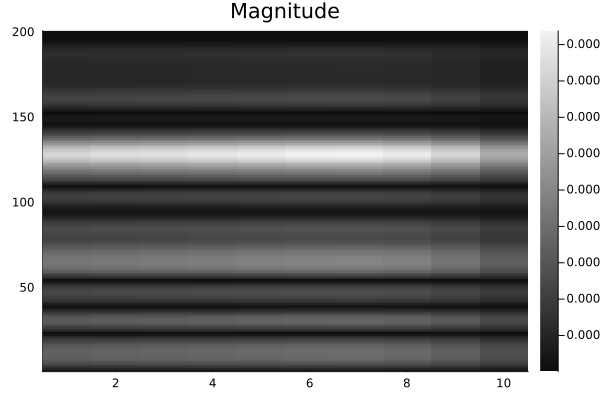

In [670]:
X_final = x1*h1'
### Plot the thing and have a look
magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


In [671]:
jldopen("Chin Young Anson, Hon1260366StudentFile.jld2", "w") do file
    write(file, "CourseWork_3", A)
 end